In [5]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_score
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
twitter = pd.read_csv ('Downloads/Mental-Health-Twitter.csv')
twitter

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [11]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [13]:
twitter.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [15]:
twitter.tail()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0
19999,19999,819334270825197568,Thu Jan 12 00:04:47 +0000 2017,Black holes are where God is dividing by zero.,1169875706,442,230,7,1063601,0,0


In [19]:
twitter.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

In [21]:
twitter.shape

(20000, 11)

In [23]:
twitter.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [25]:
df = twitter.drop (['Unnamed: 0', 'post_id', 'post_created', 'user_id', 'followers', 'friends', 
                    'favourites', 'statuses', 'retweets'], axis = 1)
df

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1
...,...,...
19995,A day without sunshine is like night.,0
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",0
19997,The flow chart is a most thoroughly oversold p...,0
19998,"Ships are safe in harbor, but they were never ...",0


In [27]:
df = df.sample (frac = 1)
df

,post_text,label
1253,Website must-have: a FAQ page via Sohnen-Moe A...,1
2477,@Tagged THE SUPPORT IS NON EXISTENT. SO NO RE...,1
13088,@Salon Possible the most narcissist person in ...,0
6307,Me again! http://t.co/541THvGsCi,1
3119,RT @5SOSTumblrx: Please be happy.. dont let an...,1
...,...,...
10683,RT @GavBurl: About to touch a sting ray...I sh...,0
19210,North Texas Collision Center https://t.co/z05f...,0
17308,RT @XiestyA: @amilinasdiya @bea_viel88 @syongs...,0
8593,"For the uninformed, I am live blogging my sist...",1


In [39]:
df.reset_index (inplace = True)
df.drop (['index'], axis = 1, inplace = True)
df

,post_text,label
0,Website must-have: a FAQ page via Sohnen-Moe A...,1
1,@Tagged THE SUPPORT IS NON EXISTENT. SO NO RE...,1
2,@Salon Possible the most narcissist person in ...,0
3,Me again! http://t.co/541THvGsCi,1
4,RT @5SOSTumblrx: Please be happy.. dont let an...,1
...,...,...
19995,RT @GavBurl: About to touch a sting ray...I sh...,0
19996,North Texas Collision Center https://t.co/z05f...,0
19997,RT @XiestyA: @amilinasdiya @bea_viel88 @syongs...,0
19998,"For the uninformed, I am live blogging my sist...",1


In [41]:
df.rename (columns = {'post_text': 'text'}, inplace = True)
df

,text,label
0,Website must-have: a FAQ page via Sohnen-Moe A...,1
1,@Tagged THE SUPPORT IS NON EXISTENT. SO NO RE...,1
2,@Salon Possible the most narcissist person in ...,0
3,Me again! http://t.co/541THvGsCi,1
4,RT @5SOSTumblrx: Please be happy.. dont let an...,1
...,...,...
19995,RT @GavBurl: About to touch a sting ray...I sh...,0
19996,North Texas Collision Center https://t.co/z05f...,0
19997,RT @XiestyA: @amilinasdiya @bea_viel88 @syongs...,0
19998,"For the uninformed, I am live blogging my sist...",1


In [45]:
# Preprocessing Text Data: WORDOPT
def wordopt(text): 
    text=text.lower()
    text=re.sub(r'\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub(r'\w*\d\w*','',text)
    return text

In [47]:
df['text'] = df['text'].apply (wordopt)
df

,text,label
0,website must have a faq page via sohnen moe a...,1
1,tagged the support is non existent so no re...,1
2,salon possible the most narcissist person in ...,0
3,me again http t co,1
4,rt please be happy dont let anyone make y...,1
...,...,...
19995,rt gavburl about to touch a sting ray i sh...,0
19996,north texas collision center https t co,0
19997,rt xiestya amilinasdiya syongshai wear...,0
19998,for the uninformed i am live blogging my sist...,1


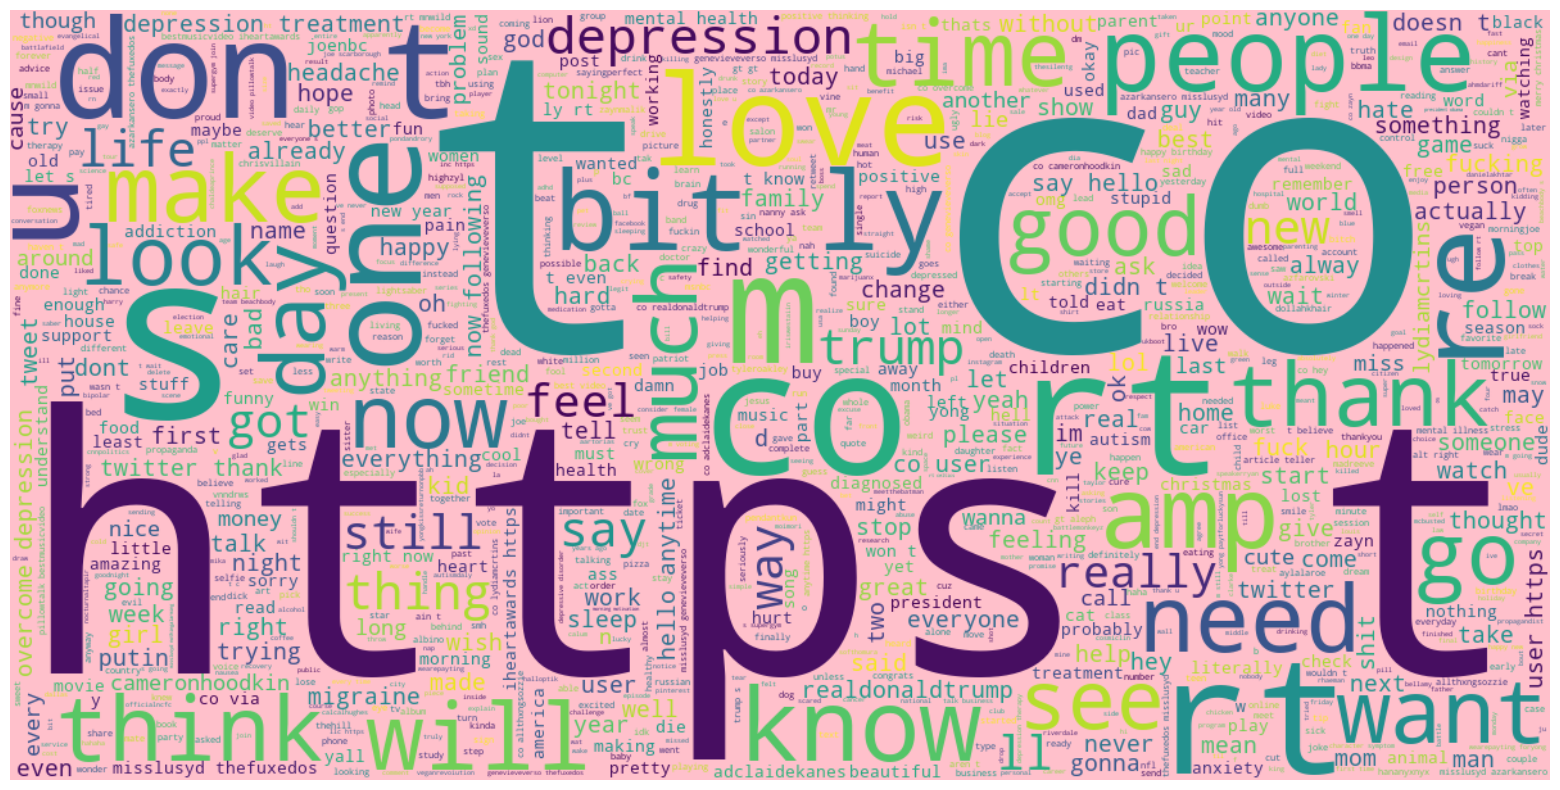

In [55]:
# Data Visualization:
text = ''.join ([word for word in df['text']])
plt.figure (figsize = (20,10), facecolor = 'None') 
wordcloud = WordCloud(max_words=1000,height=600,width=1200,background_color='pink').generate(text)
plt.imshow (wordcloud, interpolation = 'bilinear')
plt.axis ('off')
plt.show()

In [59]:
# Data Splitting:
x = df['text']
y = df ['label']
print (x)
print (y)

0        website must have  a faq page via sohnen moe a...
1         tagged the support is non existent  so  no re...
2         salon possible the most narcissist person in ...
3                                   me again  http   t co 
4        rt    please be happy   dont let anyone make y...
                               ...                        
19995    rt  gavburl  about to touch a sting ray   i sh...
19996           north texas collision center https   t co 
19997    rt  xiestya   amilinasdiya    syongshai   wear...
19998    for the uninformed  i am live blogging my sist...
19999         trump s star search https   t co  via  msnbc
Name: text, Length: 20000, dtype: object
0        1
1        1
2        0
3        1
4        1
        ..
19995    0
19996    0
19997    0
19998    1
19999    0
Name: label, Length: 20000, dtype: int64


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [65]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15000,) (5000,) (15000,) (5000,)


In [67]:
# NLP:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform (x_train)
xv_test = vectorization.transform (x_test)

In [69]:
xv_train

<15000x20352 sparse matrix of type '<class 'numpy.float64'>'
	with 172068 stored elements in Compressed Sparse Row format>

In [71]:
xv_test

<5000x20352 sparse matrix of type '<class 'numpy.float64'>'
	with 53286 stored elements in Compressed Sparse Row format>

In [73]:
xv_train.shape

(15000, 20352)

In [75]:
xv_test.shape

(5000, 20352)

In [77]:
# Deep Learning Model: PERCEPTRON (it is the simplest model among the neural network, also know as linearly separable)
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.linear_model import Perceptron

In [79]:
classifier = Perceptron (n_iter_no_change = 100, eta0=0.1)
classifier.fit (xv_train,y_train)

Perceptron(eta0=0.1, n_iter_no_change=100)

In [81]:
predictions=classifier.predict(xv_test)

In [83]:
print(accuracy_score(y_test,predictions))

0.8366
